In [33]:

import matplotlib.pyplot as plt # https://matplotlib.org/api/pyplot_summary.html
import numpy as np # https://docs.scipy.org/doc/numpy/reference/
import pandas as pd # https://pandas.pydata.org/pandas-docs/stable/
import scipy.special as spec # https://docs.scipy.org/doc/scipy/reference/special.html
import scipy.stats as st # https://docs.scipy.org/doc/scipy/reference/stats.html
import seaborn as sns # https://seaborn.pydata.org/api.html
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [8]:
print("hello world")

hello world


In [15]:
retention = pd.read_csv('Retention.txt',sep='\t')
head = retention.head();
print(head)

   spend  apret  top10    rejr   tstsc    pacc  strat  salar
0   9855  52.50     15  29.474  65.063  36.887   12.0  60800
1  10527  64.25     36  22.309  71.063  30.970   12.8  63900
2   7904  37.75     26  25.853  60.750  41.985   20.3  57800
3   6601  57.00     23  11.296  67.188  40.289   17.0  51200
4   7251  62.00     17  22.635  56.250  46.780   18.1  48000


In [16]:
print(" descriptive statistics ")
desc_retention = retention.describe(include='all')
print(desc_retention[['apret','tstsc','salar']])

 descriptive statistics 
            apret       tstsc         salar
count  170.000000  170.000000    170.000000
mean    56.721076   66.164165  61357.647059
std     18.077097    6.975306   9802.786457
min     18.750000   48.125000  38640.000000
25%     45.374750   61.111000  54650.000000
50%     55.708500   64.781500  61150.000000
75%     68.687500   70.453250  67100.000000
max     95.250000   87.500000  87900.000000


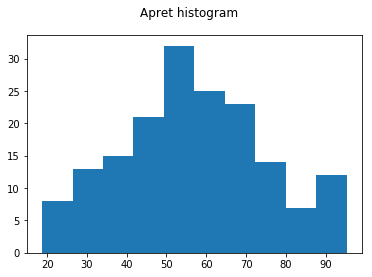

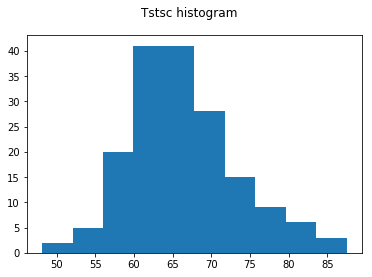

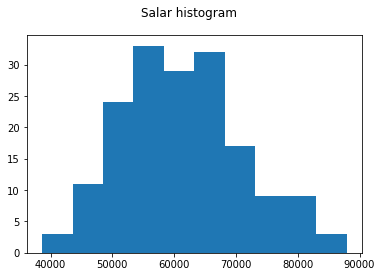

In [17]:
plt.hist(retention['apret'])
plt.suptitle('Apret histogram')
plt.show()

plt.hist(retention['tstsc'])
plt.suptitle('Tstsc histogram')
plt.show()

plt.hist(retention['salar'])
plt.suptitle('Salar histogram')
plt.show()

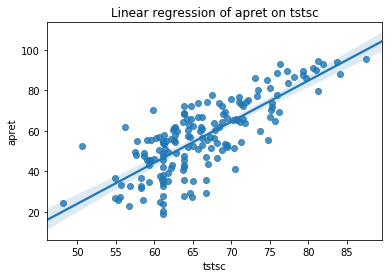

In [18]:
sns.regplot(x='tstsc', y='apret', data=retention[['tstsc','apret']])
_ = plt.title('Linear regression of apret on tstsc')
plt.show()

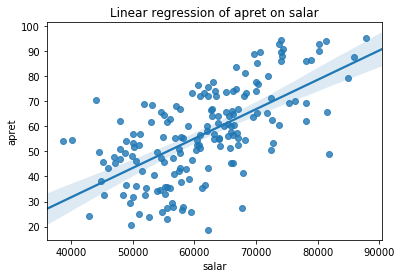

In [19]:
sns.regplot(x='salar', y='apret', data=retention[['salar','apret']])
_ = plt.title('Linear regression of apret on salar')
plt.show()

In [61]:
x1=pd.Series(retention['tstsc'])
x2=pd.Series(retention['salar'])
X=pd.concat([x1,x2],axis=1)
df2=pd.DataFrame(X,columns=['tstsc','salar'])

y=retention['apret']
df2['apret']=pd.Series(y)

model=smf.ols(formula='apret ~ tstsc + salar',data=df2)
results_formula=model.fit()
print(results_formula.summary())


                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 12 Feb 2018   Prob (F-statistic):           3.60e-36
Time:                        14:25:26   Log-Likelihood:                -649.73
No. Observations:                 170   AIC:                             1305.
Df Residuals:                     167   BIC:                             1315.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.9111      8.210     -9.246      0.0

(15000, 2)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


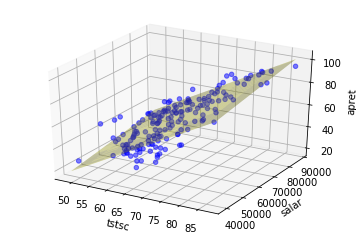

In [67]:
x_surf,y_surf =np.meshgrid(np.linspace(df2.tstsc.min(),df2.tstsc.max(),10),
                           np.linspace(df2.salar.min(),df2.salar.max(),1500))
onlyX= pd.DataFrame({'tstsc': x_surf.ravel(),'salar':y_surf.ravel()})
print(onlyX.shape)
fittedY=results_formula.predict(exog=onlyX)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df2['tstsc'],df2['salar'],df2['apret'],c='blue',marker='o',alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape),color='y',alpha=0.4)
ax.set_xlabel('tstsc')
ax.set_ylabel('salar')
ax.set_zlabel('apret')
plt.show()